<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change Runtime to T4 GPU
Runtime > Change Runtime Type > T4 GPU
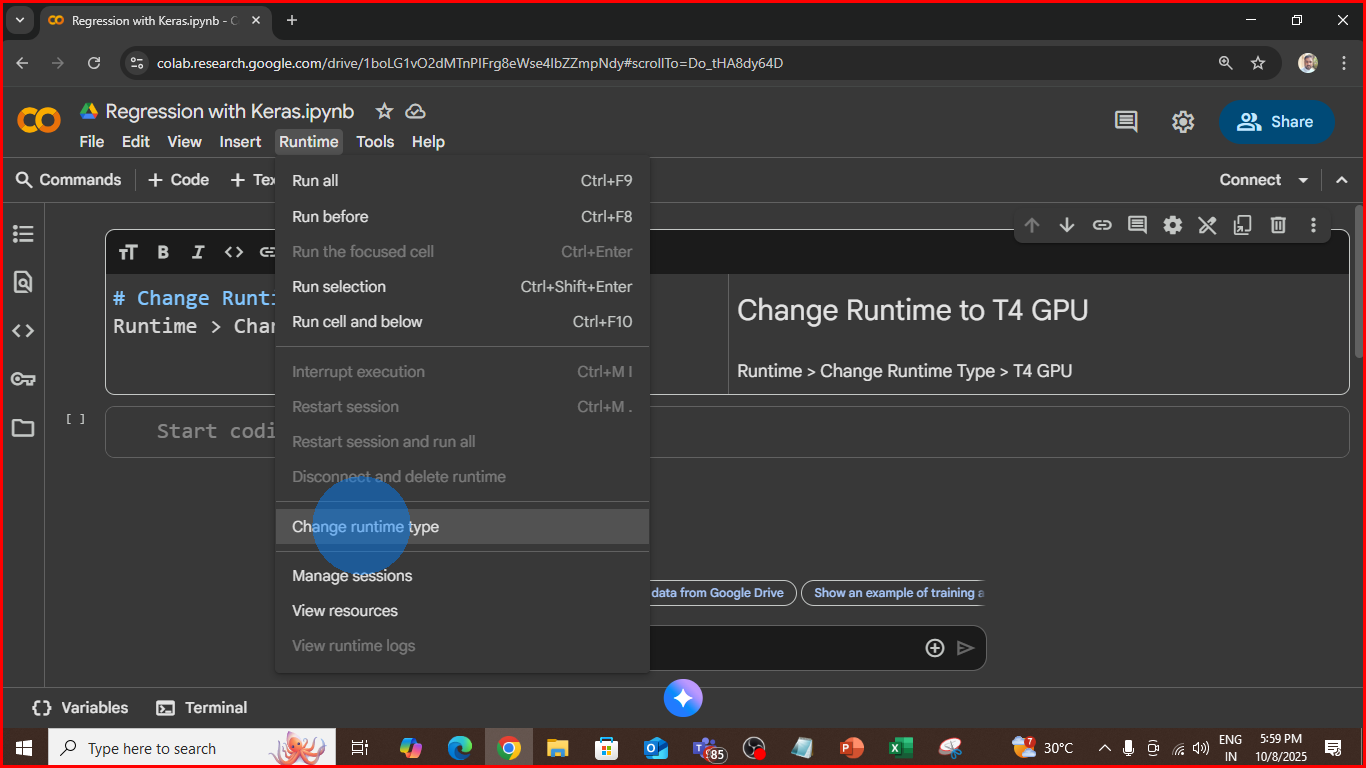

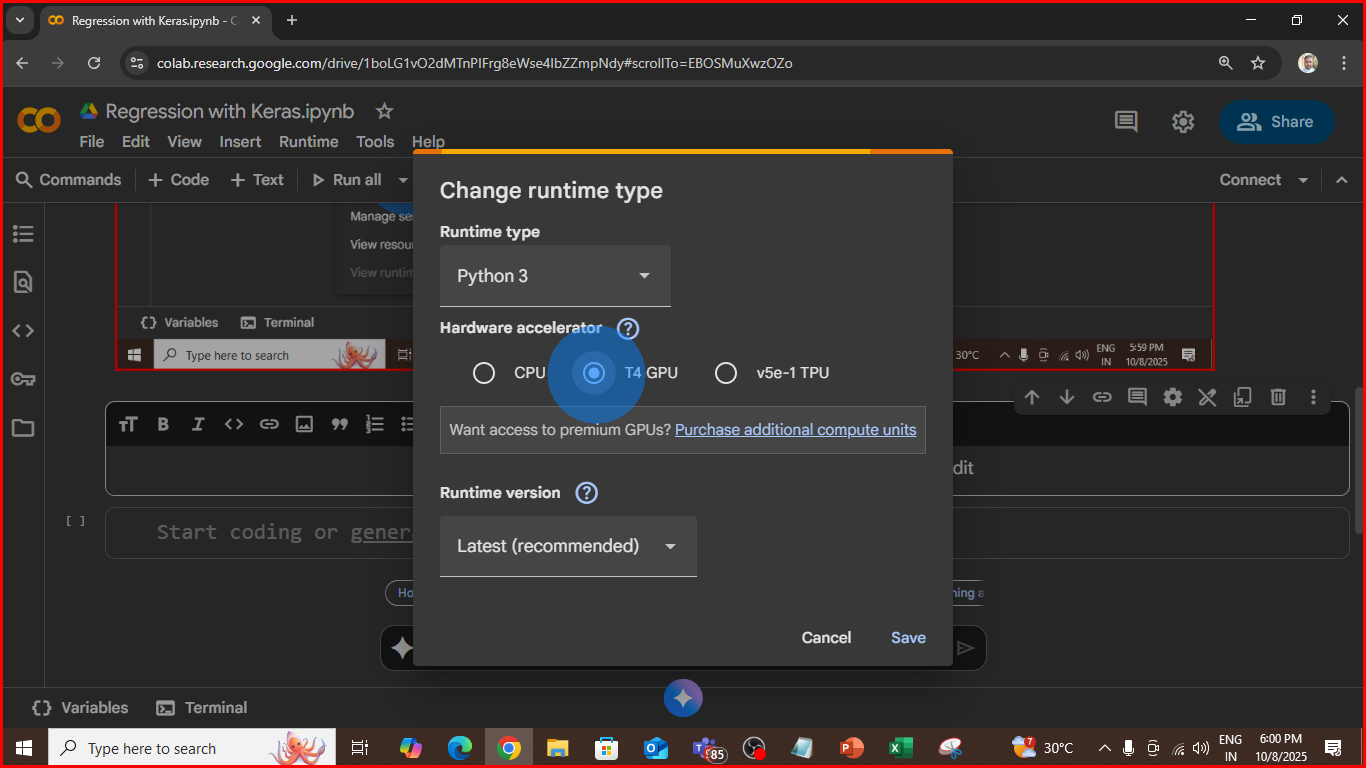

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion
Load the train data

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Features
1. PE (Target)- Power Output in MW
2. AT - Atmospheric Temperature in degree Celsius
3. V - Vacuum Pressure Pascals
4. AP - Atmospheric Pressure in Pascals
5. RH - Is relative Humidity in %

# Step 2 - Perform Basic data quality checks

In [7]:
df.shape

(9568, 5)

In [9]:
df.duplicated().sum()

np.int64(41)

In [10]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [11]:
df.shape

(9527, 5)

In [12]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)

In [4]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [5]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [6]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


#

# Step 4 - Apply Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,AT,V,AP,RH
5487,25.24,63.47,1011.30,66.21
3522,26.09,70.40,1007.41,85.37
6916,26.63,73.68,1015.15,85.13
7544,32.06,71.85,1007.90,56.44
7600,28.70,71.64,1007.11,69.85


In [16]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [17]:
xtest.head()

,AT,V,AP,RH
2513,29.70,57.35,1005.63,57.35
9411,25.71,71.64,1008.85,77.31
8745,17.83,44.92,1025.04,70.58
9085,9.46,41.40,1026.78,87.58
4950,29.90,64.79,1016.90,48.24


In [18]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [19]:
xtrain.shape

(7654, 4)

In [20]:
xtest.shape

(1914, 4)

# Step 5 - Preprocess the data

In [22]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [24]:
pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [25]:
pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [26]:
xtrain_pre = pipe.transform(xtrain)
xtest_pre = pipe.transform(xtest)

In [27]:
xtrain_pre.head()

,AT,V,AP,RH
5487,0.748053,0.720069,-0.326600,-0.497117
3522,0.861819,1.265157,-0.985211,0.818150
6916,0.934095,1.523150,0.325238,0.801675
7544,1.660862,1.379209,-0.902250,-1.167794
7600,1.211150,1.362691,-1.036004,-0.247244


In [28]:
xtest_pre.head()

,AT,V,AP,RH
2513,1.344993,0.238693,-1.286581,-1.105325
9411,0.810959,1.362691,-0.741407,0.264859
8745,-0.243724,-0.739004,1.999702,-0.197132
9085,-1.363990,-1.015874,2.294299,0.969859
4950,1.371761,0.823896,0.621529,-1.730695


# Step 6 - Build the model

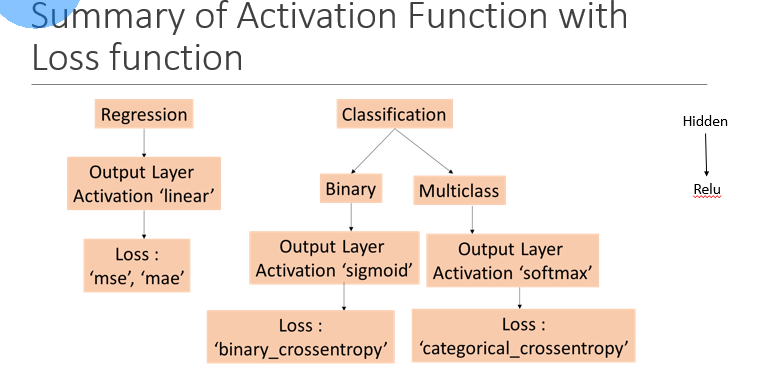

In [29]:
xtrain.shape

(7654, 4)

In [30]:
xtrain.shape[1]

4

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [32]:
model = Sequential(
    layers = [
        Input(shape = (xtrain.shape[1],)),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

# Train the weight

In [35]:
hist = model.fit(xtrain_pre, ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 206142.1406 - mae: 453.7056 - val_loss: 203770.0156 - val_mae: 451.0851
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202838.6094 - mae: 450.0401 - val_loss: 192108.1406 - val_mae: 437.9497
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185485.2812 - mae: 430.1309 - val_loss: 155505.4375 - val_mae: 393.2397
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 143019.8906 - mae: 376.0029 - val_loss: 100614.3984 - val_mae: 311.6991
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 88407.8906 - mae: 288.5054 - val_loss: 53396.9023 - val_mae: 212.9158
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 47048.3477 - mae: 196.2184 - val_loss: 29955.4199 - val_mae: 149.8114
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27559.7695 - mae: 142.2891 - val_loss: 21936.6895 - val_mae: 126.3030
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20760.6836 - m

# Step 7 - Plot learning curve and evaluate model

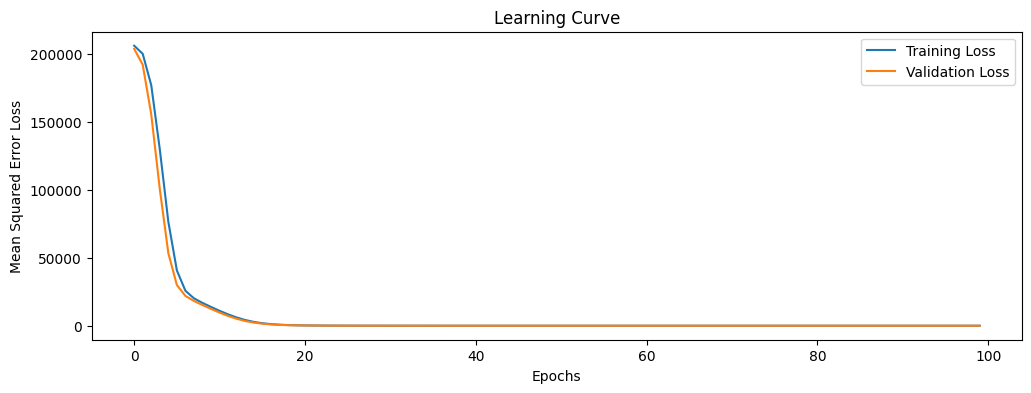

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [38]:
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
train_rmse = train_mse ** (1/2)
print(f"Train RMSE : {train_rmse:.2f}")
print(f"Train MAE : {train_mae:.2f}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.7265 - mae: 3.5821
Train RMSE : 4.56
Train MAE : 3.57


In [40]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
test_rmse = test_mse ** (1/2)
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.8795 - mae: 3.4120
Test RMSE : 4.46
Test MAE : 3.51


In [41]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [42]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [43]:
print("Train Results : ")
evaluate_model(model, xtrain_pre, ytrain)

Train Results : 
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.56
MAE : 3.57
MAPE : 0.79%
R2 : 92.88%


In [44]:
print("Test Results : ")
evaluate_model(model, xtest_pre, ytest)

Test Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE : 4.46
MAE : 3.51
MAPE : 0.78%
R2 : 93.04%


# Step 8 - Out of sample prediction

In [45]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [49]:
import pandas as pd
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [50]:
xnew.shape

(100, 4)

In [47]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [51]:
xnew_pre = pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.379985,0.354318,-0.592415,0.805794
1,1.235242,0.045199,-1.027538,-1.843275
2,1.102737,1.486181,-2.016301,0.853160
3,0.808282,0.624895,-0.313055,0.043131
4,-1.002614,-1.062282,2.126683,-0.170360


In [52]:
ypred = model.predict(xnew_pre)
ypred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[445.43582],
       [440.1125 ],
       [427.50504],
       [440.52667],
       [473.7107 ]], dtype=float32)

In [53]:
xnew["PE_pred"] = ypred.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.440002
1,28.88,54.89,1007.16,46.60,440.109985
2,27.89,73.21,1001.32,85.88,427.510010
3,25.69,62.26,1011.38,74.08,440.529999
4,12.16,40.81,1025.79,70.97,473.709991
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.809998
96,11.78,39.96,1011.37,82.95,473.640015
97,5.62,41.38,1020.91,86.21,485.049988
98,24.96,74.99,1008.25,80.52,436.040009


In [54]:
xnew.to_csv("plant_res.csv", index=False)

# Save the model object and pipeline

In [55]:
!pip install joblib

In [57]:
import joblib
joblib.dump(pipe, "plant_pre.joblib")

['plant_pre.joblib']

In [58]:
# Save the nn
model.save("plant_model.keras")

# load model objects

In [59]:
p = joblib.load("plant_pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [60]:
from tensorflow.keras.models import load_model
m = load_model("plant_model.keras")
m

<Sequential name=sequential, built=True>

In [61]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)